## HW3: Handwritten digits classification

In this assignment, you will practice using artificial neural networks to perform handwritten digits classification. Specifically, you will

    - Create a NN (50 points)
        - the numbers of hidden layers
        - the number of hidden nodes 
        - activation functions
        
    - Train the network with the early stopping strategy (30 points)
        - set the validation set (20%)
        - monitor the val_accuracy to stop training early
        
    - Report the training and test accuracy (20 points)
    
**The baseline accuracy on the test set is 96.0%; and your test acc should be higher than this number. Student will earn 20 extra points if her/his test accuracy is higher than 99.0%.

In [31]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt #using pyplot to display images

import tensorflow

print(len(tensorflow.config.list_physical_devices('GPU')))


0


#### Load the MNIST Datasets
MNIST handwritten digits. 60k 28*28 grayscale images of the 10 digits, along with a test set of 10k images

![Fig. 1](handwrittendigits.png)

| *Fig.1. Handwritten digits examples.* |

    1. Keras.datasets.mnist.load_data
    2. Show images using the imshow() function in pyplot
        - https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.pyplot.imshow.html
    3. One-hot-vector encoding using keras.utils.to_categorical() function

Training set: (60000, 28, 28) and Training Targets: (60000,)
Test set: (10000, 28, 28) and test targets: (10000,)


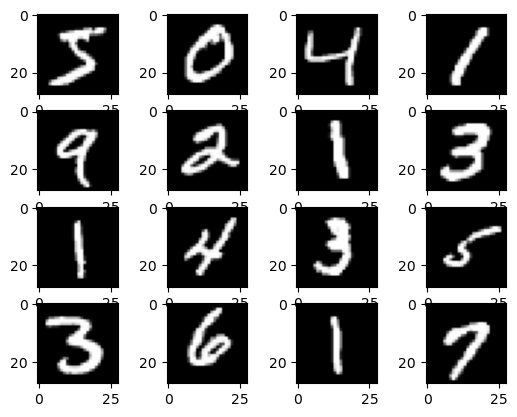

In [2]:
# load and show data
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

print('Training set: {} and Training Targets: {}'.format(X_train.shape, y_train.shape))
print('Test set: {} and test targets: {}'.format(X_test.shape, y_test.shape))

# show first 16 images
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(X_train[i], cmap = 'Greys_r')
plt.show()

In [3]:
#2. reshape image data(28*28) to vectors (784*1)
X_train_1 = np.reshape(X_train, [X_train.shape[0], X_train.shape[1] * X_train.shape[2]])
X_test_1 = np.reshape(X_test, [X_test.shape[0], X_test.shape[1] * X_test.shape[2]])
print('training data:', X_train_1.shape, 'test data:', X_test_1.shape)

#y_train_onehot = keras.utils.to_categorical(y_train)

training data: (60000, 784) test data: (10000, 784)


#### Create a neural network (50 points)

- the numbers of hidden layers
- the number of hidden nodes for each hiddern layer
- activation functions
- set the optimizer
- set the loss function and metrics

In [32]:
# Create a neural network.
# add your code here

model = keras.models.Sequential( 
                            [
                                keras.layers.InputLayer(input_shape=(784,)),
                                #keras.layers.Dense(units=10, activation = 'relu'),
                                keras.layers.Dense(units =60, activation = 'relu'), #Hidden Layer 1
                                keras.layers.Dense(units=60, activation='relu' ), #Hidden Layer 2
                                #keras.layers.Dense(units=50, activation = 'sigmoid'),
                                keras.layers.Dense(units=10, activation='softmax' )# output layer
                            ]
)

#sgd_optimizer= keras.optimizers.SGD(learning_rate=0.0001)
Adam_optimizer= keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=Adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()



#
#model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 60)                47100     
                                                                 
 dense_23 (Dense)            (None, 60)                3660      
                                                                 
 dense_24 (Dense)            (None, 10)                610       
                                                                 
Total params: 51,370
Trainable params: 51,370
Non-trainable params: 0
_________________________________________________________________


#### Train the network with the early stopping strategy (30 points)
- set the validation set (20%)
- monitor the val_accuracy to stop training early
- set the batches and epochs

In [33]:
# Train the model using the early stoping strategy
# add your code here
y_train_onehot = keras.utils.to_categorical(y_train)

print(X_train_1.shape)
print(y_train_onehot.shape)

early_stopping = keras.callbacks.EarlyStopping(monitor='accuracy', patience=5)

history = model.fit(X_train_1, y_train_onehot,
                    batch_size = 16,
                    epochs = 100,
                    callbacks=[early_stopping],
                    validation_split=0.2,
                    verbose=2)




(60000, 784)
(60000, 10)
Epoch 1/100
3000/3000 - 7s - loss: 5.9099 - accuracy: 0.7287 - val_loss: 1.6215 - val_accuracy: 0.8410 - 7s/epoch - 2ms/step
Epoch 2/100
3000/3000 - 7s - loss: 1.2297 - accuracy: 0.8616 - val_loss: 0.8862 - val_accuracy: 0.8759 - 7s/epoch - 2ms/step
Epoch 3/100
3000/3000 - 7s - loss: 0.6969 - accuracy: 0.8917 - val_loss: 0.6288 - val_accuracy: 0.8950 - 7s/epoch - 2ms/step
Epoch 4/100
3000/3000 - 7s - loss: 0.4704 - accuracy: 0.9120 - val_loss: 0.5233 - val_accuracy: 0.9042 - 7s/epoch - 2ms/step
Epoch 5/100
3000/3000 - 6s - loss: 0.3409 - accuracy: 0.9286 - val_loss: 0.4100 - val_accuracy: 0.9207 - 6s/epoch - 2ms/step
Epoch 6/100
3000/3000 - 6s - loss: 0.2662 - accuracy: 0.9380 - val_loss: 0.3691 - val_accuracy: 0.9246 - 6s/epoch - 2ms/step
Epoch 7/100
3000/3000 - 6s - loss: 0.2191 - accuracy: 0.9457 - val_loss: 0.3609 - val_accuracy: 0.9312 - 6s/epoch - 2ms/step
Epoch 8/100
3000/3000 - 7s - loss: 0.1794 - accuracy: 0.9535 - val_loss: 0.3424 - val_accuracy: 0.93

#### Report the training and test accuracy (20 points)

In [34]:
# Evaluation
import numpy as np
y_train_pred = np.argmax(model.predict(X_train_1), axis=-1)
train_acc = sum(y_train == y_train_pred)/y_train.shape[0]

y_test_pred = np.argmax(model.predict(X_test_1), axis=-1)
test_acc = sum(y_test == y_test_pred)/y_test.shape[0]



print('training acc is', train_acc)
print('test acc is', test_acc)

313/313 [==============================] - 0s 1ms/step
training acc is 0.9900166666666667
test acc is 0.9604
